In [88]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense,Dropout
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM
import os
import pickle
from tensorflow.keras.models import model_from_json


In [2]:
import seaborn as sns

In [3]:
df=pd.read_csv('DailyDelhiClimateTrain.csv',index_col='date')

In [4]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


<AxesSubplot:>

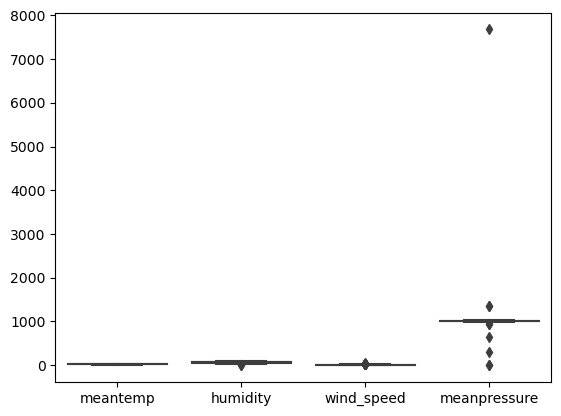

In [5]:
sns.boxplot(data=df)

In [6]:
iqr=(1014.944901-1001.580357)
l=1001.580357-(iqr)*1.5
h=1014.944901+(iqr)*1.5

In [7]:
df=df[(l<=df['meanpressure']) & (df['meanpressure']<=h)]

<AxesSubplot:>

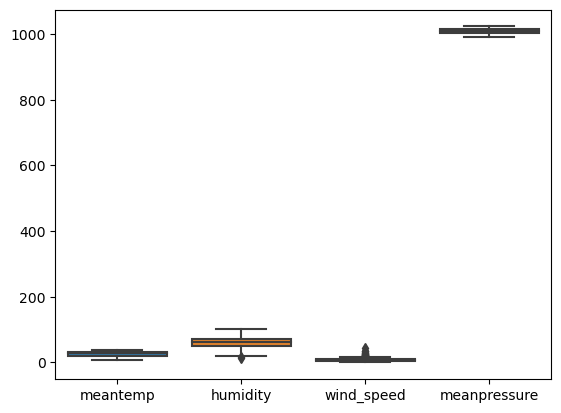

In [8]:
sns.boxplot(data=df)

<AxesSubplot:xlabel='wind_speed'>

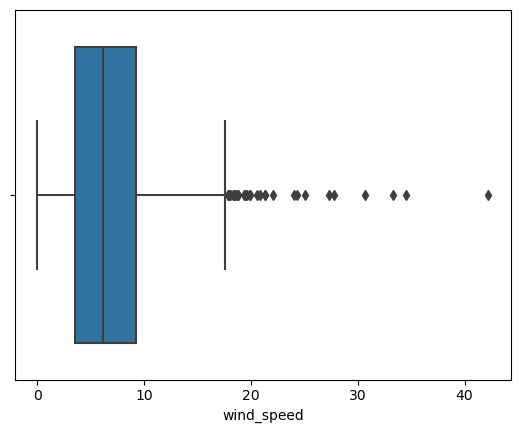

In [9]:
sns.boxplot(data=df,x='wind_speed')

In [10]:
iqr=(9.202941	-3.475000)
l=3.475-iqr*1.5
h=9.202941+1.5*iqr

In [11]:
df=df[(l<=df['wind_speed']) & (df['wind_speed']<=h)]

<AxesSubplot:xlabel='wind_speed'>

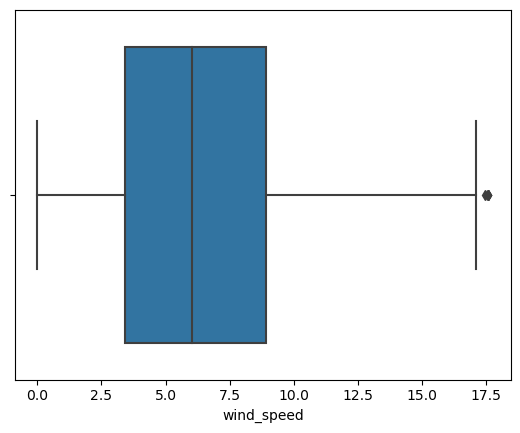

In [12]:
sns.boxplot(data=df,x='wind_speed')

<AxesSubplot:xlabel='humidity'>

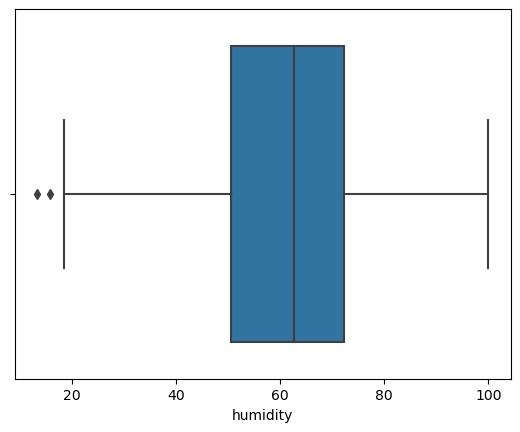

In [13]:
sns.boxplot(data=df,x='humidity')

In [14]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1421.000000,1421.000000,1421.000000,1421.000000
mean,25.421352,60.946283,6.446362,1008.320786
std,7.339058,16.723609,3.881650,7.426552
min,6.000000,13.428571,0.000000,993.125000
25%,18.750000,50.571429,3.430000,1001.647059
50%,27.625000,62.777778,6.025000,1008.714286
75%,31.250000,72.375000,8.918750,1014.947368
max,38.714286,100.000000,17.600000,1023.000000


In [15]:
iqr=(72.375000-50.571429)
l=50.571429-1.5*(iqr)
h=72.375000+1.5*(iqr)

In [16]:
df=df[(l<=df['humidity']) & (df['humidity']<=h)]

In [17]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1419.000000,1419.000000,1419.000000,1419.000000
mean,25.409764,61.011545,6.435695,1008.328001
std,7.337423,16.644616,3.873638,7.429285
min,6.000000,18.466667,0.000000,993.125000
25%,18.750000,50.750000,3.399375,1001.636029
50%,27.625000,62.833333,6.025000,1008.727273
75%,31.250000,72.375000,8.898590,1014.973684
max,38.714286,100.000000,17.600000,1023.000000


<AxesSubplot:xlabel='humidity'>

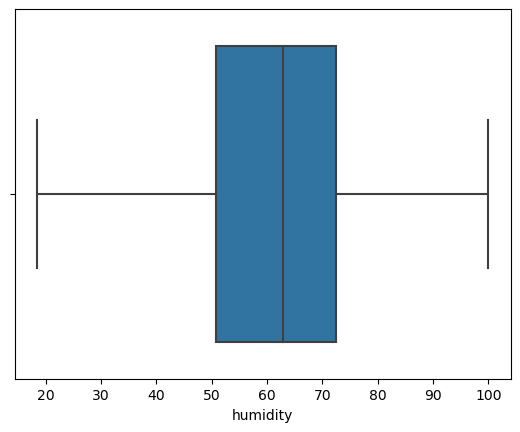

In [18]:
sns.boxplot(data=df,x='humidity')

In [19]:
dates_train=df.index

In [20]:
df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [21]:
dates_train

Index(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04', '2013-01-05',
       '2013-01-06', '2013-01-07', '2013-01-08', '2013-01-09', '2013-01-10',
       ...
       '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26', '2016-12-27',
       '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31', '2017-01-01'],
      dtype='object', name='date', length=1419)

In [22]:
# df[cols] # Open is target

In [23]:
# scaler=StandardScaler()
# df_for_training_scaled=scaler.fit_transform(df_for_training)

In [24]:
# df_for_training_scaled

In [105]:
trainX=[]
trainY=[]
testX=[]
testY=[]

In [26]:
df['meantemp_lag_1']=df['meantemp'].shift(1)
df['meantemp_lag_2']=df['meantemp'].shift(2)
df['meanpressure_lag_1']=df['meanpressure'].shift(1)

In [27]:
df

,meantemp,humidity,wind_speed,meanpressure,meantemp_lag_1,meantemp_lag_2,meanpressure_lag_1
date,,,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,NaN,NaN,NaN
2013-01-02,7.400000,92.000000,2.980000,1017.800000,10.000000,NaN,1015.666667
2013-01-03,7.166667,87.000000,4.633333,1018.666667,7.400000,10.000000,1017.800000
2013-01-04,8.666667,71.333333,1.233333,1017.166667,7.166667,7.400000,1018.666667
2013-01-05,6.000000,86.833333,3.700000,1016.500000,8.666667,7.166667,1017.166667
...,...,...,...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217,16.850000,17.142857,1017.200000
2016-12-29,15.238095,87.857143,6.000000,1016.904762,17.217391,16.850000,1015.565217
2016-12-30,14.095238,89.666667,6.266667,1017.904762,15.238095,17.217391,1016.904762


In [28]:
df.dropna(axis=0,inplace=True)

In [29]:
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)

In [30]:
# df=np.array(df[['meantemp','humidity', 'wind_speed','meanpressure','meantemp_lag_1','meantemp_lag_2']])
df_scaled

array([[-2.49786595,  1.56615235, -0.46751386, ..., -2.4642937 ,
        -2.10666536,  1.27685124],
       [-2.2927494 ,  0.62342052, -1.34603584, ..., -2.49618242,
        -2.46169183,  1.39354975],
       [-2.65740106,  1.55612329, -0.70867676, ..., -2.29118352,
        -2.49355318,  1.19157156],
       ...,
       [-1.55042281,  1.72661734, -0.0454788 , ..., -1.39309308,
        -1.12114038,  1.15630553],
       [-1.41950464,  1.56615235,  0.2279827 , ..., -1.54928272,
        -1.39141057,  1.29095765],
       [-2.11042357,  2.34841919, -1.66471538, ..., -1.41843965,
        -1.54746616,  1.04794263]])

## Window size

In [106]:

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 4  # Number of past days we want to use to predict the future.(window size)

In [32]:
# df_for_training_scaled

In [33]:
# p=0.75
# shp=int(p*len(df))
# shp

In [34]:
# df_train=df[:shp]
df.iloc[2:3,0]

date
2013-01-05    6.0
Name: meantemp, dtype: float64

In [107]:

#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (250, 5)
#250 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(df) - n_future +1):
    trainX.append(df_scaled[i - n_past:i, 1:df_scaled.shape[1]])
    trainY.append(df_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))


trainX shape == (1413, 4, 6).
trainY shape == (1413, 1).


In [36]:
df_test=pd.read_csv('DailyDelhiClimateTest.csv',index_col='date')

<AxesSubplot:>

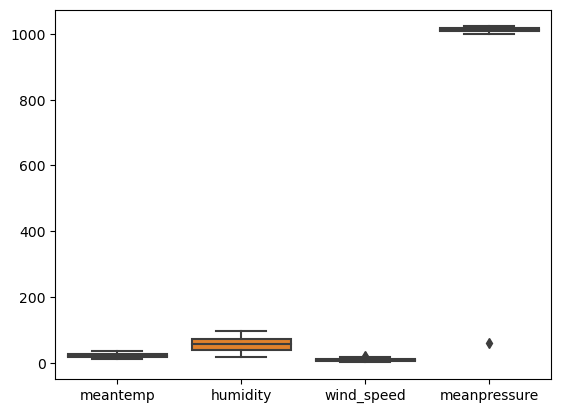

In [37]:
sns.boxplot(data=df_test)

In [38]:
iqr=(1014.944901-1001.580357)
l=1001.580357-(iqr)*1.5
h=1014.944901+(iqr)*1.5

In [39]:
df_test=df_test[(l<=df_test['meanpressure']) & (df_test['meanpressure']<=h)]

<AxesSubplot:xlabel='wind_speed'>

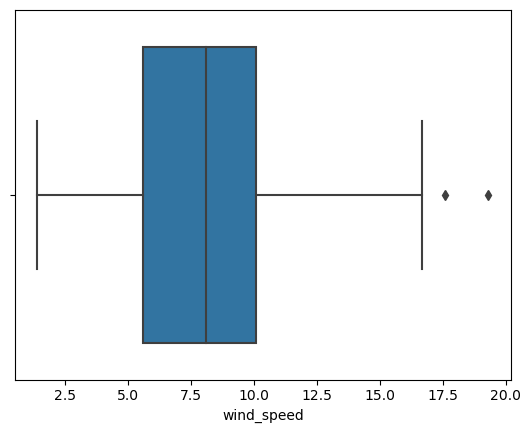

In [40]:
sns.boxplot(data=df_test,x='wind_speed')

In [41]:
df_test.describe()

,meantemp,humidity,wind_speed,meanpressure
count,113.000000,113.000000,113.000000,113.000000
mean,21.764407,55.996316,8.191716,1012.398232
std,6.364641,18.945714,3.567400,5.709981
min,11.000000,17.750000,1.387500,998.625000
25%,16.444444,39.375000,5.566667,1007.500000
50%,19.875000,57.125000,8.100000,1012.923077
75%,27.857143,71.777778,10.077778,1016.777778
max,34.500000,95.833333,19.314286,1022.809524


In [42]:
iqr=(10.077778	-5.566667)
l=5.566667-iqr*1.5
h=10.077778+1.5*iqr

<AxesSubplot:xlabel='wind_speed'>

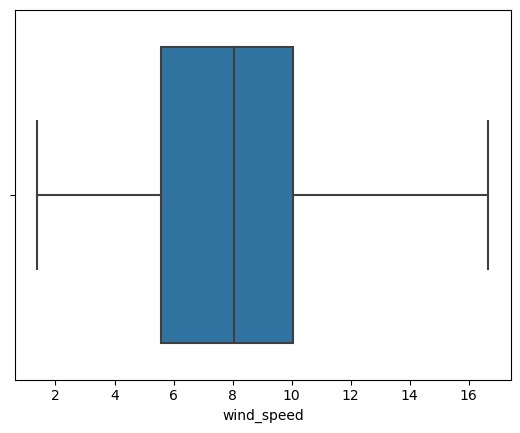

In [43]:
df_test=df_test[(l<=df_test['wind_speed']) & (df_test['wind_speed']<=h)]
sns.boxplot(data=df_test,x='wind_speed')

<AxesSubplot:xlabel='meantemp'>

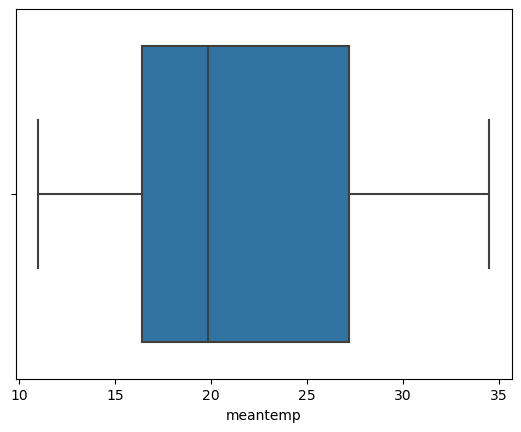

In [44]:
sns.boxplot(data=df_test,x='meantemp')

In [45]:
dates_test=df_test.index

In [46]:
df_test['meantemp_lag_1']=df_test['meantemp'].shift(1)
df_test['meantemp_lag_2']=df_test['meantemp'].shift(2)
df_test['meanpressure_lag_1']=df_test['meanpressure'].shift(1)

In [47]:
# df_test.drop('meanpressure_lag_1',inplace=True,axis=1)
df_test

,meantemp,humidity,wind_speed,meanpressure,meantemp_lag_1,meantemp_lag_2,meanpressure_lag_1
date,,,,,,,
2017-01-02,18.500000,77.222222,2.894444,1018.277778,NaN,NaN,NaN
2017-01-03,17.111111,81.888889,4.016667,1018.333333,18.500000,NaN,1018.277778
2017-01-04,18.700000,70.050000,4.545000,1015.700000,17.111111,18.500000,1018.333333
2017-01-05,18.388889,74.944444,3.300000,1014.333333,18.700000,17.111111,1015.700000
2017-01-06,19.318182,79.318182,8.681818,1011.772727,18.388889,18.700000,1014.333333
...,...,...,...,...,...,...,...
2017-04-20,34.500000,27.500000,5.562500,998.625000,33.500000,34.000000,1000.875000
2017-04-21,34.250000,39.375000,6.962500,999.875000,34.500000,33.500000,998.625000
2017-04-22,32.900000,40.900000,8.890000,1001.600000,34.250000,34.500000,999.875000


In [48]:
df_test.dropna(axis=0,inplace=True)

In [49]:
# df_test=np.array(df_test[['meantemp','humidity', 'wind_speed', 'meanpressure','meantemp_lag_1','meantemp_lag_2']])
scaler=StandardScaler()
df_test_scaled=scaler.fit_transform(df_test)

In [108]:
for i in range(n_past, len(df_test) - n_future +1):
    testX.append(df_test_scaled[i - n_past:i, 1:df_test_scaled.shape[1]])
    testY.append(df_test_scaled[i + n_future - 1:i + n_future, 0])

testX, testY = np.array(testX), np.array(testY)

print('testX shape == {}.'.format(testX.shape))
print('testY shape == {}.'.format(testY.shape))

testX shape == (105, 4, 6).
testY shape == (105, 1).


In [109]:
testX

array([[[ 0.7547095 , -1.08366069,  0.58686787, -0.70886374,
         -0.47411249,  1.02956045],
        [ 1.01899027, -1.46420322,  0.34779766, -0.45667623,
         -0.69767985,  0.5667468 ],
        [ 1.25515489,  0.18078529, -0.1001277 , -0.5060556 ,
         -0.44191879,  0.32655237],
        [ 2.14690816,  0.59643203, -0.1697019 , -0.35855878,
         -0.49199788, -0.12347932]],

       [[ 1.01899027, -1.46420322,  0.34779766, -0.45667623,
         -0.69767985,  0.5667468 ],
        [ 1.25515489,  0.18078529, -0.1001277 , -0.5060556 ,
         -0.44191879,  0.32655237],
        [ 2.14690816,  0.59643203, -0.1697019 , -0.35855878,
         -0.49199788, -0.12347932],
        [ 1.48237759, -1.8768397 ,  0.56062846, -1.0902312 ,
         -0.342411  , -0.19338069]],

       [[ 1.25515489,  0.18078529, -0.1001277 , -0.5060556 ,
         -0.44191879,  0.32655237],
        [ 2.14690816,  0.59643203, -0.1697019 , -0.35855878,
         -0.49199788, -0.12347932],
        [ 1.48237759, -1.8

In [52]:
# # define model
# model = Sequential()
# model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(trainX.shape[1], trainX.shape[2])))
# model.add(LSTM(50, activation='relu'))
# model.add(Dense(1)) # output
# model.compile(optimizer='adam', loss='mae')
# model.summary()


In [60]:
# model=Sequential()

# model.load_weights("lstm_model_weights.h5")


In [61]:
# model.load_weights("lstm_model_weights.h5")


In [62]:
model=Sequential()
model.add(LSTM(64,activation='relu',input_shape=(trainX.shape[1],trainX.shape[2]),return_sequences=True))
model.add(LSTM(32,activation='relu',return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mae')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4, 64)             18176     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 30,625
Trainable params: 30,625
Non-trainable params: 0
_________________________________________________________________


In [63]:
# fit the model
history = model.fit(trainX, trainY, epochs=50, batch_size=20, validation_split=0.1, verbose=1)

Epoch 1/50
64/64 [==============================] - 2s 7ms/step - loss: 0.5061 - val_loss: 0.2241
Epoch 2/50
64/64 [==============================] - 0s 3ms/step - loss: 0.3020 - val_loss: 0.1665
Epoch 3/50
64/64 [==============================] - 0s 4ms/step - loss: 0.2856 - val_loss: 0.2013
Epoch 4/50
64/64 [==============================] - 0s 3ms/step - loss: 0.2803 - val_loss: 0.2005
Epoch 5/50
64/64 [==============================] - 0s 3ms/step - loss: 0.2719 - val_loss: 0.1940
Epoch 6/50
64/64 [==============================] - 0s 3ms/step - loss: 0.2628 - val_loss: 0.1869
Epoch 7/50
64/64 [==============================] - 0s 3ms/step - loss: 0.2536 - val_loss: 0.1649
Epoch 8/50
64/64 [==============================] - 0s 3ms/step - loss: 0.2568 - val_loss: 0.1871
Epoch 9/50
64/64 [==============================] - 0s 3ms/step - loss: 0.2505 - val_loss: 0.1930
Epoch 10/50
64/64 [==============================] - 0s 3ms/step - loss: 0.2388 - val_loss: 0.1701
Epoch 11/50
64/64 [

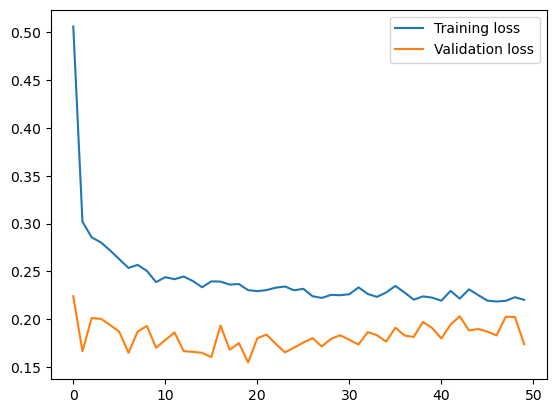

In [64]:
%matplotlib inline
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()


In [65]:
model.evaluate(testX,testY) # 0.33

4/4 [==============================] - 0s 2ms/step - loss: 0.3234


0.32336148619651794

In [138]:
s=model.load_weights("lstm_model_weights.h5")


In [66]:
# model1 = Sequential()
# # Add LSTM layers and other layers as needed
# model1.load_weights("lstm_model_weights.h5")

In [86]:
# model.save('lstm_model.h5')

In [67]:
# model.save_weights("lstm_model_weights.h5")


In [68]:
pwd

'/home/shahid/projects/dynamo-edge/old staff'

In [110]:
y_hat=[]
for i in range(len(testX)):
    y_hat.append(model.predict(testX[i].reshape(1,n_past,testX.shape[2]))[0][0])

1/1 [==============================] - 0s 20ms/step


In [111]:
prediction_copies = np.repeat(y_hat, df.shape[1], axis=-1).reshape(len(y_hat),df.shape[1])

In [112]:
np.repeat(testY,df.shape[1],axis=-1)[:,0]

array([-0.94757926, -1.12245688, -1.50910448, -1.68371953, -1.55965094,
       -1.33243514, -1.33798174, -0.8296242 , -1.11010911, -1.57021975,
       -1.36286438, -1.11497338, -1.01374917, -0.9936105 , -0.51449719,
       -0.56515609, -0.52898265, -0.11218413, -0.86988869, -0.81937506,
       -1.0765354 , -0.95033634, -0.82810581, -0.87830763, -1.01581698,
       -0.7265116 , -0.95509857, -0.47363727, -0.48438988, -0.75825979,
       -1.03546117, -0.94509789, -0.99617279, -1.10748988, -0.9568844 ,
       -0.85866344, -0.84556731, -0.76044248, -0.65099626, -0.23004928,
       -0.06503806, -0.09253993,  0.10211616,  0.26105553,  0.01877716,
       -0.40684701, -0.48542378, -0.40684701, -0.42649121, -0.46577959,
       -0.28898186,  0.25450747,  0.4318089 ,  0.31998811, -0.1907609 ,
       -0.40684701, -0.30862605, -0.26933767,  0.14319038, -0.02646401,
       -0.14585988, -0.27915976, -0.49982953, -0.68186571, -0.67095227,
       -0.58364475, -0.28898186,  0.35927649, -0.12789948,  0.46

In [113]:
y_hat=scaler.inverse_transform(prediction_copies)
y_hat_1=y_hat[:,0]
testY=scaler.inverse_transform(np.repeat(testY,df.shape[1],axis=-1))
testY=testY[:,0]

In [99]:
from sklearn.metrics import r2_score,mean_absolute_error
# r2_score(testY.reshape(len(testY)),y_hat_1) # 0.81 # 0.59 # 0.822

In [114]:
mean_absolute_error(testY,y_hat_1)

2.0576151519392987

In [78]:
len(y_hat_1)

105

<AxesSubplot:xlabel='date', ylabel='Temp *C'>

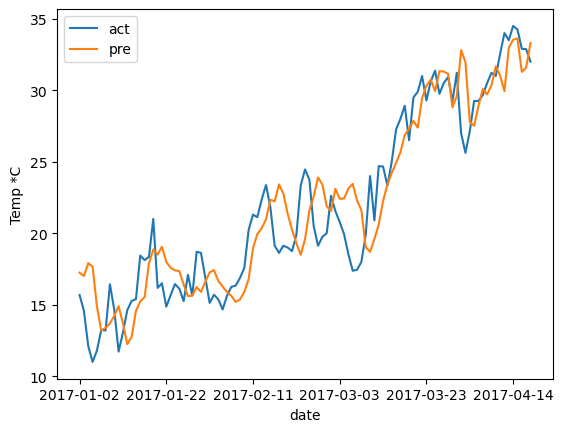

In [79]:
# y_hat=np.array(y_hat).reshape(1214)
df1=pd.DataFrame(index=dates_test[:-n_past-2])
df1['act']=testY.reshape(len(testY))
df1['pre']=y_hat_1

df1.plot(ylabel='Temp *C')


<AxesSubplot:xlabel='date', ylabel='Temp *C'>

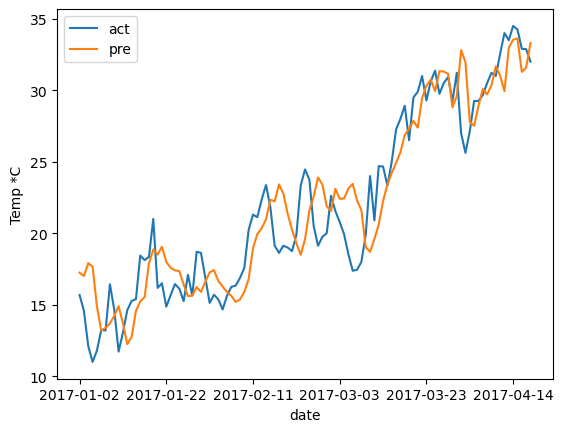

In [80]:
# y_hat=np.array(y_hat).reshape(1214)
df1=pd.DataFrame(index=dates_test[:-n_past-2])
df1['act']=testY.reshape(len(testY))
df1['pre']=y_hat_1

df1.plot(ylabel='Temp *C')


In [81]:
y_hat=[]
for i in range(len(trainX)):
    y_hat.append(model.predict(trainX[i].reshape(1,n_past,trainX.shape[2]))[0][0])

1/1 [==============================] - 0s 14ms/step


In [82]:
prediction_copies = np.repeat(y_hat, df.shape[1], axis=-1).reshape(len(y_hat),df.shape[1])

In [83]:
y_hat=scaler.inverse_transform(prediction_copies)
y_hat_1=y_hat[:,0]
trainY=scaler.inverse_transform(np.repeat(trainY,df.shape[1],axis=-1))
trainY=trainY[:,0]

In [85]:
from sklearn.metrics import r2_score
r2_score(trainY,y_hat_1) # actual,predicted # 0.8769 # 0.946 # 0.946

0.9421778953771789

<AxesSubplot:xlabel='date', ylabel='Temp *C'>

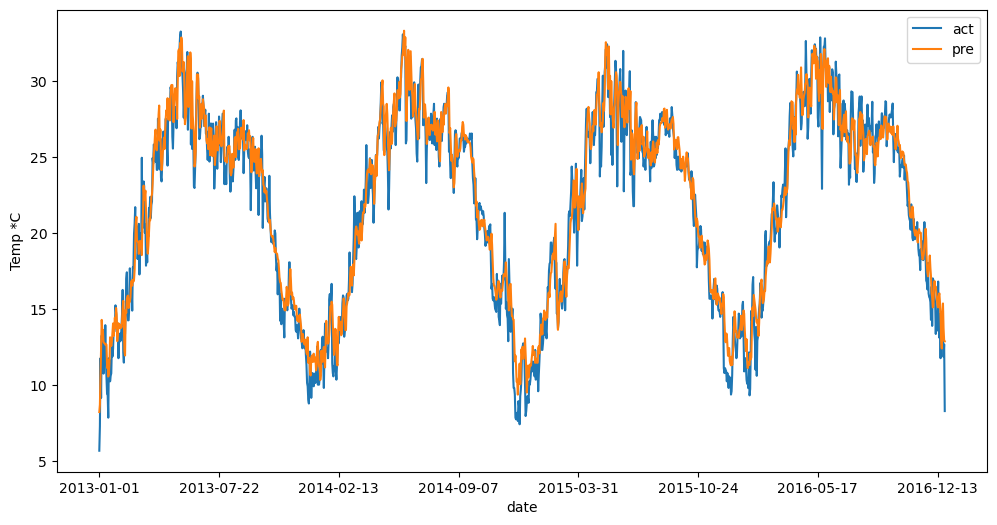

In [86]:
df1=pd.DataFrame(index=dates_train[:-4-1-1]) #because of droping the nan values 
df1['act']=trainY.reshape(len(trainY))
df1['pre']=y_hat_1

# df1.plot(xlabel=dates_train,ylabel='Temp *C',grid=True)
df1.plot(figsize=(12,6),ylabel='Temp *C')

In [90]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense,Dropout
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [91]:
import pickle
with open('model_lstm.pkl', 'wb') as f:
    pickle.dump(model, f)

# load dataset




Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dropout
.........vars
......lstm
.........cell
............vars
...............0
...............1
...............2
.........vars
......lstm_1
.........cell
............vars
...............0
...............1
...............2
.........vars
...metrics
......mean
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-06-08 14:12:36         2762
metadata.json                                  2023-06-08 14:12:36           64
variables.h5                                   2023-06-08 14:12:36  

In [92]:
# Load the pickled model from the file
with open('model_lstm.pkl', 'rb') as f:
    model3 = pickle.load(f)

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-06-08 14:12:36         2762
metadata.json                                  2023-06-08 14:12:36           64
variables.h5                                   2023-06-08 14:12:36       396624
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......dense
.........vars
............0
............1
......dropout
.........vars
......lstm
.........cell
............vars
...............0
...............1
...............2
.........vars
......lstm_1
.........cell
............vars
...............0
...............1
...............2
.........vars
...metrics
......mean
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........2
.........3
.........4
.........5
.........6
.........7
.........8
......

In [96]:
model.weights

[<tf.Variable 'lstm/lstm_cell/kernel:0' shape=(6, 256) dtype=float32, numpy=
 array([[-0.06212376,  0.11926471, -0.12026829, ..., -0.1523274 ,
         -0.26323766, -0.14958599],
        [-0.11434872,  0.05490698, -0.20442055, ...,  0.0839185 ,
          0.03859291, -0.03915446],
        [-0.0516155 ,  0.01401394,  0.00980101, ..., -0.0845644 ,
         -0.09761418, -0.07818975],
        [ 0.07002921, -0.06289038,  0.010672  , ..., -0.06971186,
          0.24730223, -0.2107703 ],
        [-0.0721629 , -0.191702  ,  0.08165011, ...,  0.14206254,
         -0.02768931, -0.01568806],
        [-0.04771778,  0.08036324,  0.08997815, ...,  0.09891099,
         -0.14829725, -0.08643685]], dtype=float32)>,
 <tf.Variable 'lstm/lstm_cell/recurrent_kernel:0' shape=(64, 256) dtype=float32, numpy=
 array([[ 0.04086583, -0.03511248, -0.04700188, ...,  0.11418843,
          0.1235432 ,  0.03064496],
        [ 0.09970536,  0.20694329, -0.03122348, ..., -0.06670922,
         -0.05856605,  0.00847791],
 

### unscaled Data

In [71]:
y_hat=[]
for i in range(len(testX)):
    y_hat.append(model.predict(testX[i].reshape(1,n_past,testX.shape[2]))[0][0])

1/1 [==============================] - 0s 15ms/step


In [72]:
# y_hat=scaler.inverse_transform(np.array(y_hat).repeat(4).reshape(107,4))
y_hat=scaler.inverse_transform(np.array(y_hat).repeat(df.shape[1]).reshape(len(testY),df.shape[1]))
y_hat=y_hat[:,0]
testY=scaler.inverse_transform(testY.reshape(len(testY)).repeat(df.shape[1]).reshape(len(testY),df.shape[1]))
testY=testY[:,0]

In [73]:
testY

array([121.51567808, 114.43481974,  98.77931839,  91.70909198,
        96.7326739 , 105.93272394, 105.70814028, 126.29172119,
       114.93478576,  96.30473915, 104.70063302, 114.73782945,
       118.83643439, 119.65185638, 139.05132806, 137.00013061,
       138.46480667, 155.34112973, 124.66139724, 126.70671274,
       116.29419747, 121.40404293, 126.35320142, 124.32051132,
       118.75270802, 130.4667877 , 121.21121857, 140.70576104,
       140.27038394, 129.18129198, 117.95730755, 121.61614972,
       119.54810849, 115.04083915, 121.13890944, 125.1159118 ,
       125.64617878, 129.09291415, 133.52443107, 150.56872689,
       157.25009086, 156.1365302 , 164.01822578, 170.45373869,
       160.64379954, 143.41012265, 140.22852076, 143.41012265,
       142.61472218, 141.02392123, 148.18252548, 170.1886052 ,
       177.36760433, 172.83994011, 152.15952784, 143.41012265,
       147.38712501, 148.97792595, 165.68133586, 158.81196815,
       153.97758606, 148.58022571, 139.64522708, 132.27

In [74]:
from sklearn.metrics import r2_score
r2_score(testY.reshape(len(testY)),y_hat)#0.84

-11.314656935465926

In [75]:
y_hat_train=[]
for i in range(len(trainX)):
    y_hat_train.append(model.predict(trainX[i].reshape(1,n_past,trainX.shape[2]))[0][0])

1/1 [==============================] - 0s 14ms/step


In [76]:
y_hat_train=scaler.inverse_transform(np.array(y_hat_train).repeat(df.shape[1]).reshape(len(y_hat_train),df.shape[1]))
y_hat_train=y_hat_train[:,0]

In [77]:
trainX=[]
trainY=[]
df=np.array(df)
for i in range(n_past, len(df) - n_future +1):
    trainX.append(df[i - n_past:i, 1:df.shape[1]])
    trainY.append(df[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (1413, 4, 6).
trainY shape == (1413, 1).


In [78]:
from sklearn.metrics import r2_score
r2_score(trainY.reshape(len(trainY)),y_hat_train)  #0.84

0.6902221823194417

In [79]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(trainY.reshape(len(trainY)),y_hat_train)

3.6265029089666094

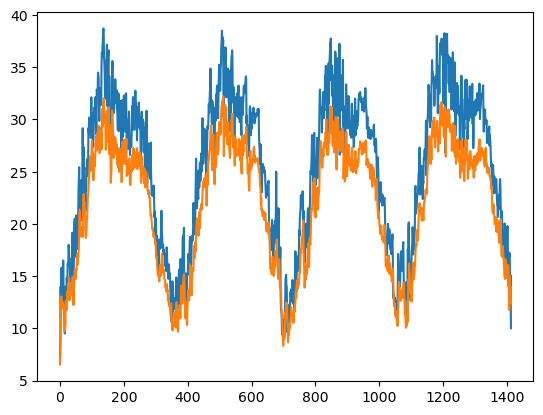

In [80]:
plt.plot(np.arange(0,len(trainX)),trainY.reshape(len(trainY)))
plt.plot(np.arange(0,len(trainX)),y_hat_train)

In [ ]:
# df1=pd.DataFrame()
# df1['act']=testY.reshape(64)
# df1['pre']=y_hat
# df1.plot()

In [ ]:
# y_hat=[]
# for i in range(1214):
#     y_hat.append(model.predict(trainX[i].reshape(1,50,3)))

In [ ]:
# df1=pd.DataFrame()
# df1['act']=trainY.reshape(1214)
# df1['pre']=y_hat
# df1.plot()

In [ ]:
# n_days_for_predictioaan=50  #let us predict past 15 days

# predict_period_dates = pd.date_range('2017-01-01', periods=n_days_for_prediction, freq='1d').tolist()
# print(predict_period_dates)

In [ ]:
#Make prediction
# prediction = model.predict(testX) #shape = (n, 1) where n is the n_days_for_prediction

In [ ]:
# prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
# y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

In [ ]:
# # Convert timestamp to date
# forecast_dates = []
# for time_i in predict_period_dates:
#     forecast_dates.append(time_i.date())
    
# df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Open':y_pred_future})
# df_forecast['Date']=pd.to_datetime(df_forecast['Date'])

In [ ]:
# original = df[['Date', 'Open']]
# original['Date']=pd.to_datetime(original['Date'])
# # original = original.loc[original['Date'] >= '2020-5-1']

# sns.lineplot(original['Date'], original['Open'])
# sns.lineplot(df_forecast['Date'], df_forecast['Open'])